# 1. Bootstrap 알고리즘

|점수|빈도수|
|:---:|:---:|
|10|14|
|20|15|
|30|17|
|40|15|
|50|14|

### 교육학자 A는 75명의 학생에 대한 수학점수를 뽑았다. <br> Bootstrap 알고리즘을 이용하여 평균과 분산의 분포를 그래프로 나타내시오

1. 자체 sampling은 10,000번 시행
2. 한번에 뽑는 수는 20(sample_num=20)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
iter_num = 10000
sample_num = 20

In [3]:
#bootstrap
import random

 
def pick_sample(): # 샘플링으로 20개를 뽑는 함수
    p = [10,20,30,40,50]
    r = random.choices(range(0,5),weights=[14,15,17,15,14],k=20) # 75명을 대상으로 한 시행의 결과를 사용한다.
    n = [] # 샘플링 결과를 저장할 리스트
    for i in range(20):
        n.append(p[r[i]])
    return n
    
all_mu = [] # 10000개의 평균들 저장
all_var = [] # 10000개의 분산들 저장

for i in range(10000):
    sp = pick_sample()
    mu = sum(sp)//20 # 평균
    var = (np.std(sp))**2
    all_mu.append(mu)
    all_var.append(int(var))



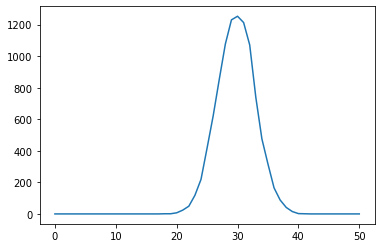

In [4]:
#평균의 분포

min_mu = min(all_mu) # 최소 평균값
max_mu = max(all_mu) # 최대 평균값

MU = [0 for i in range(51)] # 평균의 분포(빈도)를 저장할 리스트
for i in range(min_mu, max_mu+1): # 빈도수를 저장
    for j in range(10000):
        if(i == all_mu[j]):
            MU[i] = MU[i] + 1
x = np.arange(0,51,1)
plt.plot(x,MU)
plt.show()

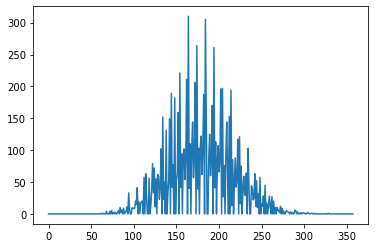

In [5]:
#분산의 분포
min_var = min(all_var) # 최소 분산
max_var = max(all_var) # 최대 분산

VAR = [0 for i in range(0, max_var + 30)] # 결과 분산의 분포를 저장할 리스트
for i in range(min_mu, max_var+50): # 분산의 분포를 계산
    for j in range(10000): 
        if(i == all_var[j]):
            VAR[i] = VAR[i] + 1
            
x = np.arange(0,max_var + 30,1)
plt.plot(x,VAR)
plt.show()

# 2. MLE

### 2.1. MLE를 통해 평균과 분산을 선택하시오. 

풀이과정 : MLE는 현재 얻은 데이터를 중심으로 생각하고 분포를 해석하므로 평균과 분산은 현재 데이터에서 구할 수 있다.

mu= 30   <br> 
var= {(10-30)^2*(14/75) + (20-30)^2*(15/75) + (30-30)^2*(17/75) + (40-30)^2*(15/75) + (50-20)^2*(14/75)} - mu^2
> var = 1089.3 - 900 = 189

In [18]:
var= 189
mu= 30

### 2.2. MLE를 통해 얻은 평균과 분산을 사용하여 정규분포를 그리고, 표본분포 그래프와 비교하시오.

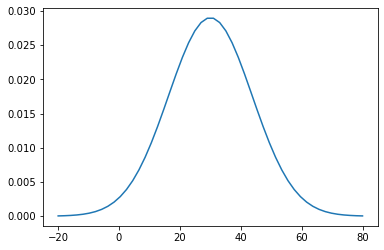

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

mu = 30 # 평균
sigma = 13.75  #sqrt(189)# 표준편차 >> 표준편차의 제곱 = 분산

x = np.linspace(-20, 80)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
y_cum = 0.5 * (1 + erf((x - mu)/(np.sqrt(2 * sigma**2))))

plt.plot(x, y)
plt.show()

In [ ]:
# MLE를 통해 얻은 평균과 분산을 사용한 정규분포를는 표본분포 그래프와 분포가 아주 비슷하다